In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

% matplotlib inline

In [24]:
# the dataset was scrapped from the internet using BS4 and saved to excel file
file_name = "trump_lies.csv"
df_import = pd.read_csv(file_name)
df = df_import.copy()

In [6]:
df.head()

,date,lie,explanation,url
0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


<AxesSubplot:xlabel='date'>

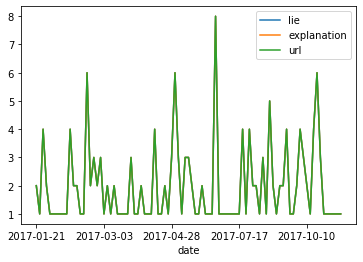

In [7]:
df.groupby('date').count().plot()

In [30]:
def create_wordcloud(series):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in series:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
  
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

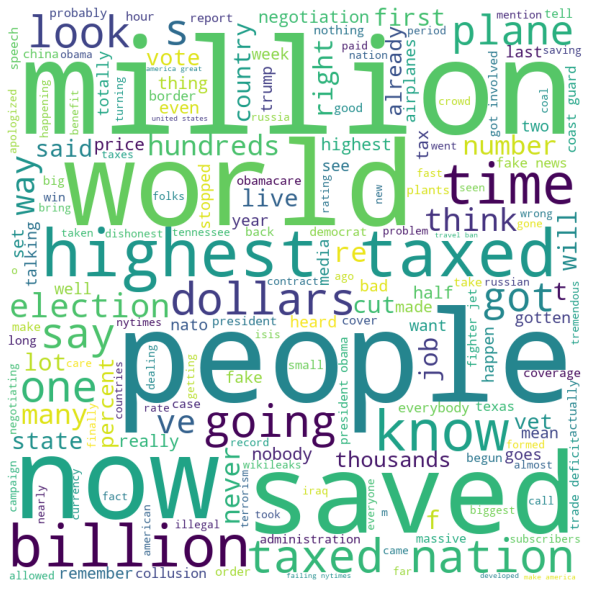

In [32]:
create_wordcloud(df.lie)
plt.savefig("trump_lie_world_cloud.png")
plt.show()

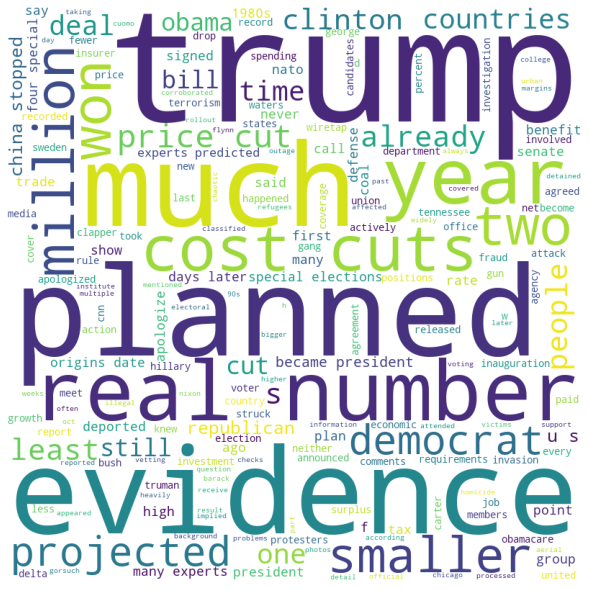

In [34]:
create_wordcloud(df.explanation)
plt.savefig("trump_lie_evidence_world_cloud.png")
plt.show()